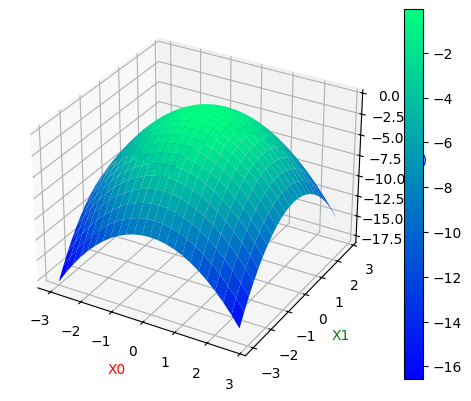

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数
def fun(x, y):
    return -(np.power(x, 2) + np.power(y, 2))

# 创建 3D 图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # 添加3D子图

# 生成数据
X0 = np.arange(-3, 3, 0.25)
X1 = np.arange(-3, 3, 0.25)
X0, X1 = np.meshgrid(X0, X1)
Z = fun(X0, X1)

# 绘制曲面图，并使用 cmap 着色
surf = ax.plot_surface(X0, X1, Z, cmap=plt.cm.winter)
ax.set_xlabel('X0', color='r')
ax.set_ylabel('X1', color='g')
ax.set_zlabel('f(x)', color='b')  # 给三个坐标轴注明坐标名称

# 添加颜色条
fig.colorbar(surf)
plt.show()


In [2]:
import tensorflow as tf

def func(x):
    return x ** 2 + 2 * x - 1  # 1元函数

def gradient_test():
    x = tf.constant(value=2.0)
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = func(x)

    # 一阶导数
    order_1 = tape.gradient(target=y, sources=x)
    print("函数 x ** 2 + 2 * x - 1 在 x = 2 处的梯度为：", order_1.numpy())
    
gradient_test()


函数 x ** 2 + 2 * x - 1 在 x = 2 处的梯度为： 6.0


In [3]:
import tensorflow as tf

x = tf.Variable(2.0, trainable=True)
with tf.GradientTape() as tape1:
    with tf.GradientTape() as tape2:
        y = x ** 2 + 2 * x - 1
    order_1 = tape2.gradient(y, x)
order_2 = tape1.gradient(order_1, x)

print("在 x = 2 处的一阶梯度为：", order_1.numpy())
print("在 x = 2 处的二阶梯度为：", order_2.numpy())


在 x = 2 处的一阶梯度为： 6.0
在 x = 2 处的二阶梯度为： 2.0


In [4]:
def func(x):  # 注意：此处为一个多元张量
    return x[0] ** 2 + 3 * x[0] * x[1] + x[1] ** 2 + x[2] ** 3

def gradient_test():  # 求 n (=3) 元函数的梯度
    x = tf.Variable([1.0, 2.0, 3.0], dtype=tf.float32)  # 使用 tf.Variable 而不是 tf.constant
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = func(x)
    # 一阶导数
    order_1 = tape.gradient(target=y, sources=x)
    # 因为 x 是一个张量列表，所以 order_1 也是一个张量列表
    print("多元函数 x = [1.0, 2.0, 3.0] 的梯度为：", [grad.numpy() for grad in order_1])

if __name__ == "__main__":
    gradient_test()


多元函数 x = [1.0, 2.0, 3.0] 的梯度为： [8.0, 7.0, 27.0]


In [5]:
import numpy as np
import random
import tensorflow as tf

# 定义损失函数
def loss(y_true, y_pred):
    return tf.keras.losses.MeanSquaredError()(y_true, y_pred)

# 生成训练数据
x_train_inch = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype=np.float32)
y_train_price = np.array([10 * num + 5 for num in x_train_inch], dtype=np.float32)  # y = 10x + 5

# 随机初始化待训练的参数
w1 = tf.Variable(random.random(), trainable=True, dtype=tf.float32)
w0 = tf.Variable(random.random(), trainable=True, dtype=tf.float32)

def step_gradient(real_x, real_y, learning_rate):
    with tf.GradientTape() as tape:
        # 计算模型预测
        pred_y = w1 * real_x + w0
        # 计算损失
        reg_loss = loss(real_y, pred_y)
    # 计算梯度
    w1_gradients, w0_gradients = tape.gradient(reg_loss, (w1, w0))
    # 更新权值
    w1.assign_sub(w1_gradients * learning_rate)
    w0.assign_sub(w0_gradients * learning_rate)

if __name__ == "__main__":
    learning_rate = 0.01
    num_iterations = 1000

    for _ in range(num_iterations):
        step_gradient(tf.convert_to_tensor(x_train_inch), tf.convert_to_tensor(y_train_price), learning_rate)

    print(f"拟合得到的模型近似为: y ≈ {w1.numpy()}x + {w0.numpy()}")

    # 预测
    wheat = 0.9
    price = w1 * wheat + w0
    print("price = {:.2f}".format(price.numpy()))


拟合得到的模型近似为: y ≈ 10.005026817321777x + 4.961641311645508
price = 13.97
